In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# reading files

In [2]:
data = pd.read_csv("C:/Users/Kaige Zhang/Desktop/t1.csv")

In [3]:
data.head(5)

,Date,Hour,Minute,Sec,GridVoltage,GenerationCurrent,Impedance,GridCurrent,PowerFactor,GridImportEnergy,GridExportEnergy,GenerationImportEnergy,GenerationExportEnergy,Id
0,2019-01-08,23,36,2,240,1.3,0.0,1.3,0.98,0.1,0.0,0.1,0.0,96
1,2019-01-08,23,44,49,238,1.2,0.0,1.2,0.98,0.1,0.0,0.1,0.0,96
2,2019-01-08,23,45,49,238,1.2,0.0,1.2,0.98,0.1,0.0,0.1,0.0,96
3,2019-01-08,23,46,49,239,1.2,0.0,1.2,0.98,0.1,0.0,0.1,0.0,96
4,2019-01-08,23,47,49,238,1.2,0.0,1.2,0.98,0.1,0.0,0.1,0.0,96


In [4]:
data.shape

(6708168, 14)

# group  by date

In [5]:
data = data.drop(['GenerationCurrent'], axis = 1)
data = data.drop(['GenerationImportEnergy'], axis = 1)
data = data.drop(['GenerationExportEnergy'], axis = 1)
data = data.drop(['Impedance'], axis = 1)
data = data.drop(['PowerFactor'], axis = 1)
data = data.drop(['GridExportEnergy'], axis = 1)
data = data.drop(['GridImportEnergy'], axis = 1)
data = data.drop(['GridCurrent'], axis = 1)

In [6]:
data.head(5)

,Date,Hour,Minute,Sec,GridVoltage,Id
0,2019-01-08,23,36,2,240,96
1,2019-01-08,23,44,49,238,96
2,2019-01-08,23,45,49,238,96
3,2019-01-08,23,46,49,239,96
4,2019-01-08,23,47,49,238,96


In [7]:
weekday_data1 =  data[data['Date'] >= '2019-01-15']
weekday_data2 = data[data['Date'] <= '2019-04-10']
# 取并集
weekday_data = pd.merge (weekday_data1,weekday_data2,on=['Id', 'Date', 'Hour', 'Minute', 'Sec', 'GridVoltage'])
weekday_data = weekday_data.groupby(['Id','Date','Hour','Minute']).mean()
weekday_data = weekday_data.reset_index()

In [8]:
weekday_data.head()

,Id,Date,Hour,Minute,Sec,GridVoltage
0,4,2019-01-15,0,0,13.0,247.0
1,4,2019-01-15,0,1,13.0,247.0
2,4,2019-01-15,0,2,13.0,247.0
3,4,2019-01-15,0,3,15.0,247.0
4,4,2019-01-15,0,4,13.0,247.0


In [9]:
Hour_list = weekday_data['Hour'].drop_duplicates().tolist()

In [10]:
date_list = weekday_data['Date'].drop_duplicates().tolist()

In [11]:
id_list = weekday_data['Id'].drop_duplicates().tolist()

In [12]:
# 创建一个新的空的datafram， 分段 10min
ten_minutes = pd.DataFrame(columns = ['Id','Segment', 'GridVoltage'])
ten_minutes.head()


for i in range(len(id_list)):
    segment = 0 
    for d in range(len(date_list)):
        print(i,d)
        tem = weekday_data[weekday_data['Date'] == date_list[d]]
#         print(tem)
        temp = tem[tem['Id'] == id_list[i]]
        for k in range(len(Hour_list)):
            # 找出一个小时的
            temp2 = temp[temp['Hour']== Hour_list[k]]
    #         print(temp2)
            # 每个小时6个10min
            for j in range(6):  
                rows = temp2.loc[(temp2['Minute'] >= j * 10) & (temp2['Minute'] < (j + 1) * 10)]
#                 print(rows)
                avg = rows['GridVoltage'].mean()
        #         print(avg)

                row = {'Id':id_list[i], 'Segment':segment, 'GridVoltage':avg}
                segment += 1
    #             print(row)
                ten_minutes = ten_minutes.append([row], ignore_index=True)
        #         print(ten_minutes)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
1 66
1 67
1 68
1 69
1 70
1 71
1 72
1 73
1 74
1 75
1 76
1 77
1 78
1 79
1 80
1 81
1 82
1 83
1 84
1 85
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33


17 77
17 78
17 79
17 80
17 81
17 82
17 83
17 84
17 85
18 0
18 1
18 2
18 3
18 4
18 5
18 6
18 7
18 8
18 9
18 10
18 11
18 12
18 13
18 14
18 15
18 16
18 17
18 18
18 19
18 20
18 21
18 22
18 23
18 24
18 25
18 26
18 27
18 28
18 29
18 30
18 31
18 32
18 33
18 34
18 35
18 36
18 37
18 38
18 39
18 40
18 41
18 42
18 43
18 44
18 45
18 46
18 47
18 48
18 49
18 50
18 51
18 52
18 53
18 54
18 55
18 56
18 57
18 58
18 59
18 60
18 61
18 62
18 63
18 64
18 65
18 66
18 67
18 68
18 69
18 70
18 71
18 72
18 73
18 74
18 75
18 76
18 77
18 78
18 79
18 80
18 81
18 82
18 83
18 84
18 85
19 0
19 1
19 2
19 3
19 4
19 5
19 6
19 7
19 8
19 9
19 10
19 11
19 12
19 13
19 14
19 15
19 16
19 17
19 18
19 19
19 20
19 21
19 22
19 23
19 24
19 25
19 26
19 27
19 28
19 29
19 30
19 31
19 32
19 33
19 34
19 35
19 36
19 37
19 38
19 39
19 40
19 41
19 42
19 43
19 44
19 45
19 46
19 47
19 48
19 49
19 50
19 51
19 52
19 53
19 54
19 55
19 56
19 57
19 58
19 59
19 60
19 61
19 62
19 63
19 64
19 65
19 66
19 67
19 68
19 69
19 70
19 71
19 72
19 73
19 74


34 9
34 10
34 11
34 12
34 13
34 14
34 15
34 16
34 17
34 18
34 19
34 20
34 21
34 22
34 23
34 24
34 25
34 26
34 27
34 28
34 29
34 30
34 31
34 32
34 33
34 34
34 35
34 36
34 37
34 38
34 39
34 40
34 41
34 42
34 43
34 44
34 45
34 46
34 47
34 48
34 49
34 50
34 51
34 52
34 53
34 54
34 55
34 56
34 57
34 58
34 59
34 60
34 61
34 62
34 63
34 64
34 65
34 66
34 67
34 68
34 69
34 70
34 71
34 72
34 73
34 74
34 75
34 76
34 77
34 78
34 79
34 80
34 81
34 82
34 83
34 84
34 85
35 0
35 1
35 2
35 3
35 4
35 5
35 6
35 7
35 8
35 9
35 10
35 11
35 12
35 13
35 14
35 15
35 16
35 17
35 18
35 19
35 20
35 21
35 22
35 23
35 24
35 25
35 26
35 27
35 28
35 29
35 30
35 31
35 32
35 33
35 34
35 35
35 36
35 37
35 38
35 39
35 40
35 41
35 42
35 43
35 44
35 45
35 46
35 47
35 48
35 49
35 50
35 51
35 52
35 53
35 54
35 55
35 56
35 57
35 58
35 59
35 60
35 61
35 62
35 63
35 64
35 65
35 66
35 67
35 68
35 69
35 70
35 71
35 72
35 73
35 74
35 75
35 76
35 77
35 78
35 79
35 80
35 81
35 82
35 83
35 84
35 85
36 0
36 1
36 2
36 3
36 4
36 5
36 

In [13]:
ten_minutes.head()

,Id,Segment,GridVoltage
0,4,0,246.6
1,4,1,246.0
2,4,2,246.0
3,4,3,246.0
4,4,4,245.3


In [14]:
ten_minutes.shape

(458208, 3)

In [15]:
#  ten_minutes.drop(ten_minutes.columns[len(ten_minutes.columns)-1], axis=1, inplace=True)

In [16]:
# find Na
nan = ten_minutes[ten_minutes.isnull().T.any()]
null_list = nan['Segment'].drop_duplicates().tolist()

In [17]:
tm = ten_minutes

In [18]:
for i in range(len(null_list)):
    ten_minutes = ten_minutes[~ten_minutes['Segment'].isin([null_list[i]])]

In [19]:
ten_minutes.shape

(171051, 3)

In [20]:
col = ['Id']
col += [x for x in range(144)]

data_ten_minutes = pd.DataFrame(columns = col)
for i in range(len(id_list)):
    temp = ten_minutes[ten_minutes['Id'] == id_list[i]]
    vol = temp['GridVoltage'].tolist()
#     vol.insert(0, id_list[i])
#     print(len(vol))
    row = {'Id':id_list[i]}
    for i in range(len(vol)):
        row[i] = vol[i]
#     print(row)
    data_ten_minutes = data_ten_minutes.append([row], ignore_index=True)
    

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [21]:
data_ten_minutes=pd.DataFrame(data_ten_minutes,dtype=np.float)
data_ten_minutes.round(1)
data_ten_minutes.head()

,Id,0,1,2,3,4,5,6,7,8,...,4613,4614,4615,4616,4617,4618,4619,4620,4621,4622
0,4.0,243.9,242.100000,243.8,245.0,242.40,242.400000,244.100,244.300000,244.800000,...,243.5,243.2,242.9,242.8,244.611111,248.0,244.7,242.5,243.0,243.8
1,5.0,242.7,241.800000,242.9,243.0,240.40,241.722222,244.800,245.900000,247.000000,...,244.2,242.5,242.5,241.0,243.555556,247.5,244.9,244.2,245.4,243.8
2,8.0,242.7,240.444444,243.1,242.2,239.25,240.166667,241.375,241.888889,243.333333,...,242.0,241.6,241.3,241.1,242.800000,244.9,242.7,241.5,241.5,241.5
3,10.0,235.3,231.400000,235.8,233.8,231.50,234.200000,234.700,233.100000,235.600000,...,239.6,239.5,238.4,240.0,241.300000,242.2,239.5,239.3,238.6,236.8
4,12.0,232.8,230.500000,235.2,232.7,229.90,232.900000,233.600,231.200000,233.700000,...,238.5,238.9,238.3,239.2,240.388889,241.1,239.1,238.9,238.4,237.1


In [22]:
tranpose_ten = pd.DataFrame(data_ten_minutes.values.T, index=data_ten_minutes.columns, columns=data_ten_minutes.index)

In [23]:
tranpose_ten = tranpose_ten.drop(labels='Id', axis=0)

In [24]:
tranpose_ten.columns = id_list

In [25]:
tranpose_ten

,4,5,8,10,12,15,16,17,18,29,...,66,70,75,76,78,85,92,96,99,100
0,243.900000,242.700000,242.700000,235.3,232.800000,244.900000,242.600000,243.300000,244.700000,242.800000,...,235.4,231.900000,233.2,243.300000,237.8,233.8,242.6,241.200000,233.722222,235.900000
1,242.100000,241.800000,240.444444,231.4,230.500000,244.111111,241.600000,242.000000,243.000000,241.700000,...,233.7,230.055556,231.3,243.600000,235.9,231.9,241.5,241.100000,231.857143,232.500000
2,243.800000,242.900000,243.100000,235.8,235.200000,245.900000,242.900000,243.800000,244.500000,242.900000,...,237.0,234.700000,235.5,244.300000,238.5,235.9,242.8,242.000000,235.777778,236.100000
3,245.000000,243.000000,242.200000,233.8,232.700000,246.500000,243.100000,243.800000,245.300000,243.600000,...,233.2,231.900000,233.0,246.200000,237.3,233.1,243.2,244.500000,232.875000,233.500000
4,242.400000,240.400000,239.250000,231.5,229.900000,242.800000,240.200000,241.000000,242.400000,240.700000,...,231.2,229.166667,230.2,243.100000,234.7,230.5,240.3,240.000000,230.642857,231.300000
5,242.400000,241.722222,240.166667,234.2,232.900000,243.111111,241.611111,242.500000,242.500000,241.400000,...,233.6,232.777778,232.9,242.100000,236.6,233.1,241.1,237.600000,233.125000,233.800000
6,244.100000,244.800000,241.375000,234.7,233.600000,244.500000,244.000000,244.388889,244.400000,243.700000,...,233.9,233.000000,234.0,245.400000,237.6,233.9,243.5,238.600000,233.928571,233.000000
7,244.300000,245.900000,241.888889,233.1,231.200000,244.800000,245.300000,245.700000,244.400000,245.500000,...,232.9,231.000000,231.1,244.000000,236.3,230.4,245.0,239.100000,231.166667,232.200000
8,244.800000,247.000000,243.333333,235.6,233.700000,245.666667,246.444444,246.777778,245.100000,246.300000,...,235.1,233.333333,233.5,245.300000,238.0,233.5,246.2,240.000000,233.500000,235.600000
9,245.300000,243.100000,242.888889,235.5,235.400000,246.000000,242.000000,243.350000,245.300000,243.100000,...,237.3,235.200000,235.8,244.000000,239.4,236.3,242.8,243.100000,236.125000,233.800000


In [26]:
tranpose_ten = tranpose_ten.astype(float)
tranpose_ten

,4,5,8,10,12,15,16,17,18,29,...,66,70,75,76,78,85,92,96,99,100
0,243.900000,242.700000,242.700000,235.3,232.800000,244.900000,242.600000,243.300000,244.700000,242.800000,...,235.4,231.900000,233.2,243.300000,237.8,233.8,242.6,241.200000,233.722222,235.900000
1,242.100000,241.800000,240.444444,231.4,230.500000,244.111111,241.600000,242.000000,243.000000,241.700000,...,233.7,230.055556,231.3,243.600000,235.9,231.9,241.5,241.100000,231.857143,232.500000
2,243.800000,242.900000,243.100000,235.8,235.200000,245.900000,242.900000,243.800000,244.500000,242.900000,...,237.0,234.700000,235.5,244.300000,238.5,235.9,242.8,242.000000,235.777778,236.100000
3,245.000000,243.000000,242.200000,233.8,232.700000,246.500000,243.100000,243.800000,245.300000,243.600000,...,233.2,231.900000,233.0,246.200000,237.3,233.1,243.2,244.500000,232.875000,233.500000
4,242.400000,240.400000,239.250000,231.5,229.900000,242.800000,240.200000,241.000000,242.400000,240.700000,...,231.2,229.166667,230.2,243.100000,234.7,230.5,240.3,240.000000,230.642857,231.300000
5,242.400000,241.722222,240.166667,234.2,232.900000,243.111111,241.611111,242.500000,242.500000,241.400000,...,233.6,232.777778,232.9,242.100000,236.6,233.1,241.1,237.600000,233.125000,233.800000
6,244.100000,244.800000,241.375000,234.7,233.600000,244.500000,244.000000,244.388889,244.400000,243.700000,...,233.9,233.000000,234.0,245.400000,237.6,233.9,243.5,238.600000,233.928571,233.000000
7,244.300000,245.900000,241.888889,233.1,231.200000,244.800000,245.300000,245.700000,244.400000,245.500000,...,232.9,231.000000,231.1,244.000000,236.3,230.4,245.0,239.100000,231.166667,232.200000
8,244.800000,247.000000,243.333333,235.6,233.700000,245.666667,246.444444,246.777778,245.100000,246.300000,...,235.1,233.333333,233.5,245.300000,238.0,233.5,246.2,240.000000,233.500000,235.600000
9,245.300000,243.100000,242.888889,235.5,235.400000,246.000000,242.000000,243.350000,245.300000,243.100000,...,237.3,235.200000,235.8,244.000000,239.4,236.3,242.8,243.100000,236.125000,233.800000


In [27]:
ten_corr = tranpose_ten.corr()
ten_corr

,4,5,8,10,12,15,16,17,18,29,...,66,70,75,76,78,85,92,96,99,100
4,1.000000,0.492707,0.667365,0.355961,0.327477,0.929478,0.510313,0.572908,0.972796,0.558323,...,0.334979,0.310828,0.317966,0.481421,0.471531,0.324993,0.539896,0.567415,0.329625,0.310119
5,0.492707,1.000000,0.421062,0.178888,0.199227,0.456451,0.967937,0.937566,0.502113,0.962990,...,0.220564,0.202090,0.204291,0.512346,0.293176,0.206574,0.971236,0.163396,0.208550,0.124567
8,0.667365,0.421062,1.000000,0.657677,0.645369,0.707270,0.431208,0.468562,0.694469,0.463614,...,0.647672,0.628684,0.639832,0.325381,0.751665,0.646092,0.460532,0.505447,0.644328,0.644167
10,0.355961,0.178888,0.657677,1.000000,0.958317,0.278935,0.168046,0.144967,0.338119,0.167285,...,0.911164,0.947601,0.943186,0.310604,0.923318,0.937851,0.187060,0.406328,0.936180,0.919555
12,0.327477,0.199227,0.645369,0.958317,1.000000,0.243920,0.186841,0.140311,0.308012,0.174443,...,0.968278,0.995169,0.994222,0.344019,0.960153,0.989382,0.200185,0.493442,0.989329,0.900855
15,0.929478,0.456451,0.707270,0.278935,0.243920,1.000000,0.477646,0.561769,0.949201,0.535886,...,0.255552,0.224835,0.236303,0.512697,0.409677,0.244160,0.511067,0.581352,0.247451,0.251093
16,0.510313,0.967937,0.431208,0.168046,0.186841,0.477646,1.000000,0.951611,0.521306,0.975731,...,0.210340,0.187011,0.189129,0.508937,0.287226,0.191095,0.983889,0.195053,0.195019,0.123477
17,0.572908,0.937566,0.468562,0.144967,0.140311,0.561769,0.951611,1.000000,0.590215,0.983470,...,0.155215,0.136299,0.138524,0.508984,0.252742,0.140498,0.974920,0.167403,0.142870,0.100869
18,0.972796,0.502113,0.694469,0.338119,0.308012,0.949201,0.521306,0.590215,1.000000,0.572304,...,0.316806,0.291274,0.299421,0.486415,0.458108,0.306401,0.551656,0.548367,0.310671,0.300577
29,0.558323,0.962990,0.463614,0.167285,0.174443,0.535886,0.975731,0.983470,0.572304,1.000000,...,0.191914,0.172148,0.174318,0.528003,0.283001,0.175538,0.993210,0.186882,0.179258,0.119187


In [28]:
dissimilarity = 1 - np.abs(ten_corr)

In [29]:
dissimilarity

,4,5,8,10,12,15,16,17,18,29,...,66,70,75,76,78,85,92,96,99,100
4,0.000000,0.507293,0.332635,0.644039,0.672523,0.070522,0.489687,0.427092,0.027204,0.441677,...,0.665021,0.689172,0.682034,0.518579,0.528469,0.675007,0.460104,0.432585,0.670375,0.689881
5,0.507293,0.000000,0.578938,0.821112,0.800773,0.543549,0.032063,0.062434,0.497887,0.037010,...,0.779436,0.797910,0.795709,0.487654,0.706824,0.793426,0.028764,0.836604,0.791450,0.875433
8,0.332635,0.578938,0.000000,0.342323,0.354631,0.292730,0.568792,0.531438,0.305531,0.536386,...,0.352328,0.371316,0.360168,0.674619,0.248335,0.353908,0.539468,0.494553,0.355672,0.355833
10,0.644039,0.821112,0.342323,0.000000,0.041683,0.721065,0.831954,0.855033,0.661881,0.832715,...,0.088836,0.052399,0.056814,0.689396,0.076682,0.062149,0.812940,0.593672,0.063820,0.080445
12,0.672523,0.800773,0.354631,0.041683,0.000000,0.756080,0.813159,0.859689,0.691988,0.825557,...,0.031722,0.004831,0.005778,0.655981,0.039847,0.010618,0.799815,0.506558,0.010671,0.099145
15,0.070522,0.543549,0.292730,0.721065,0.756080,0.000000,0.522354,0.438231,0.050799,0.464114,...,0.744448,0.775165,0.763697,0.487303,0.590323,0.755840,0.488933,0.418648,0.752549,0.748907
16,0.489687,0.032063,0.568792,0.831954,0.813159,0.522354,0.000000,0.048389,0.478694,0.024269,...,0.789660,0.812989,0.810871,0.491063,0.712774,0.808905,0.016111,0.804947,0.804981,0.876523
17,0.427092,0.062434,0.531438,0.855033,0.859689,0.438231,0.048389,0.000000,0.409785,0.016530,...,0.844785,0.863701,0.861476,0.491016,0.747258,0.859502,0.025080,0.832597,0.857130,0.899131
18,0.027204,0.497887,0.305531,0.661881,0.691988,0.050799,0.478694,0.409785,0.000000,0.427696,...,0.683194,0.708726,0.700579,0.513585,0.541892,0.693599,0.448344,0.451633,0.689329,0.699423
29,0.441677,0.037010,0.536386,0.832715,0.825557,0.464114,0.024269,0.016530,0.427696,0.000000,...,0.808086,0.827852,0.825682,0.471997,0.716999,0.824462,0.006790,0.813118,0.820742,0.880813


In [30]:
import seaborn as sns

In [31]:
heatmap_ten = tranpose_ten
heatmap_ten =  heatmap_ten.drop([8], axis=1)
heatmap_ten = heatmap_ten.drop([34], axis=1)
# labels =  [2,1,0,2,2,1,1,2,0,0,0,2,2,1,0,0,0,0,2,2,2,1,1,0,1,0,0,0,1,0,0,1,2,0,0]
orders = [10, 29, 31, 32, 43, 45, 46, 47, 62, 66, 70, 75, 76, 78, 85, 99, 100, 5, 16, 17, 41, 54, 57, 76, 92, 4, 12, 15, 18, 39, 40, 49, 50, 52, 96]
heatmap_ten = heatmap_ten[orders]

In [32]:
heatmap_corr = heatmap_ten.corr()

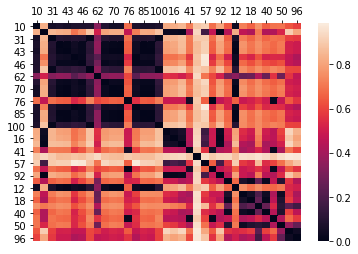

In [33]:
heat_dissimilarity = 1 - np.abs(heatmap_corr)
ax = sns.heatmap(heat_dissimilarity.T)

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(0)

ax.xaxis.set_ticks_position('top')

# save figure
plt.savefig('heatmap.png', dpi=1000)
plt.show()

# kmeans

In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics


In [35]:
clinski_harabaz_scores = []
cluster_num = range(2, 10)

for i in cluster_num:
    kmeans = KMeans(n_clusters = i, n_jobs = 4)
    predict = kmeans.fit_predict(dissimilarity)
    clinski_harabaz_scores.append(metrics.calinski_harabasz_score(dissimilarity, predict))

In [36]:
clinski_harabaz_scores

[66.16220217284318,
 72.75892628612172,
 75.06394773070068,
 85.94645053522252,
 107.774971644063,
 144.95044543024838,
 189.56024668879874,
 241.27089683832884]

In [37]:
kmeans = KMeans(n_clusters = 3, n_jobs = 4)
labels_kmeans = kmeans.fit_predict(dissimilarity)

In [38]:
labels_kmeans

array([2, 1, 2, 0, 0, 2, 1, 1, 2, 1, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 1, 1, 2, 1, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0])

In [39]:
data_ten_minutes['labels_kmeans'] = labels_kmeans

# mean shift

In [58]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [59]:
meanShift = MeanShift(bandwidth=1.5)
labels_mean = meanShift.fit_predict(dissimilarity)

In [60]:
labels_mean

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [61]:
data_ten_minutes['labels_meanshift'] = labels_mean

ValueError: Length of values does not match length of index

# DBSCAN

In [44]:
from sklearn.cluster import DBSCAN

In [45]:
labels_dbscan = DBSCAN(eps = 0.36).fit_predict(dissimilarity)

In [46]:
labels_dbscan

array([-1,  0, -1,  1,  1, -1,  0,  0, -1,  0,  1,  1, -1, -1, -1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  0,
       -1,  1,  1], dtype=int64)

In [47]:
data_ten_minutes['labels_dbscan'] = labels_dbscan + 1

# Gaussian 

In [48]:
from sklearn import mixture

In [49]:
labels_gaussian = mixture.GaussianMixture(n_components=3, covariance_type='full').fit(dissimilarity).predict(dissimilarity)

In [50]:
labels_gaussian

array([2, 1, 2, 0, 0, 2, 1, 1, 2, 1, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 2, 1, 2, 1, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0], dtype=int64)

In [51]:
data_ten_minutes['labels_gaussian'] = labels_gaussian

### 删除id 8 和34， 这两个id无原始label

In [52]:
labels =  [2,1,0,2,2,1,1,2,0,0,0,2,2,1,0,0,0,0,2,2,2,1,1,0,1,0,0,0,1,0,0,1,2,0,0]
 # 删除id = 8 id = 34 因为没有这两个id的label
data_ten_minutes =  data_ten_minutes.drop(labels=2, axis=0)
data_ten_minutes = data_ten_minutes.drop(labels=12, axis=0)

data_ten_minutes['labels'] = labels
data_ten_minutes

,Id,0,1,2,3,4,5,6,7,8,...,4618,4619,4620,4621,4622,labels_kmeans,labels_meanshift,labels_dbscan,labels_gaussian,labels
0,4.0,243.900000,242.100000,243.800000,245.000,242.400000,242.400000,244.100000,244.300000,244.800000,...,248.0,244.700000,242.500000,243.0,243.800,2,1,0,2,2
1,5.0,242.700000,241.800000,242.900000,243.000,240.400000,241.722222,244.800000,245.900000,247.000000,...,247.5,244.900000,244.200000,245.4,243.800,1,2,1,1,1
3,10.0,235.300000,231.400000,235.800000,233.800,231.500000,234.200000,234.700000,233.100000,235.600000,...,242.2,239.500000,239.300000,238.6,236.800,0,0,2,0,0
4,12.0,232.800000,230.500000,235.200000,232.700,229.900000,232.900000,233.600000,231.200000,233.700000,...,241.1,239.100000,238.900000,238.4,237.100,0,0,2,0,2
5,15.0,244.900000,244.111111,245.900000,246.500,242.800000,243.111111,244.500000,244.800000,245.666667,...,248.0,245.000000,243.400000,243.5,243.900,2,1,0,2,2
6,16.0,242.600000,241.600000,242.900000,243.100,240.200000,241.611111,244.000000,245.300000,246.444444,...,247.6,245.400000,244.300000,245.4,244.200,1,2,1,1,1
7,17.0,243.300000,242.000000,243.800000,243.800,241.000000,242.500000,244.388889,245.700000,246.777778,...,248.0,245.500000,243.700000,245.2,244.800,1,2,1,1,1
8,18.0,244.700000,243.000000,244.500000,245.300,242.400000,242.500000,244.400000,244.400000,245.100000,...,247.4,244.500000,243.100000,243.0,243.700,2,1,0,2,2
9,29.0,242.800000,241.700000,242.900000,243.600,240.700000,241.400000,243.700000,245.500000,246.300000,...,247.8,245.600000,244.200000,245.6,244.800,1,2,1,1,0
10,31.0,235.900000,232.055556,236.500000,233.400,231.500000,234.500000,234.062500,233.600000,236.555556,...,240.6,238.400000,237.900000,237.7,237.700,0,0,2,0,0


# plot 原始图

In [53]:
import matplotlib.pyplot as plt

from collections import OrderedDict

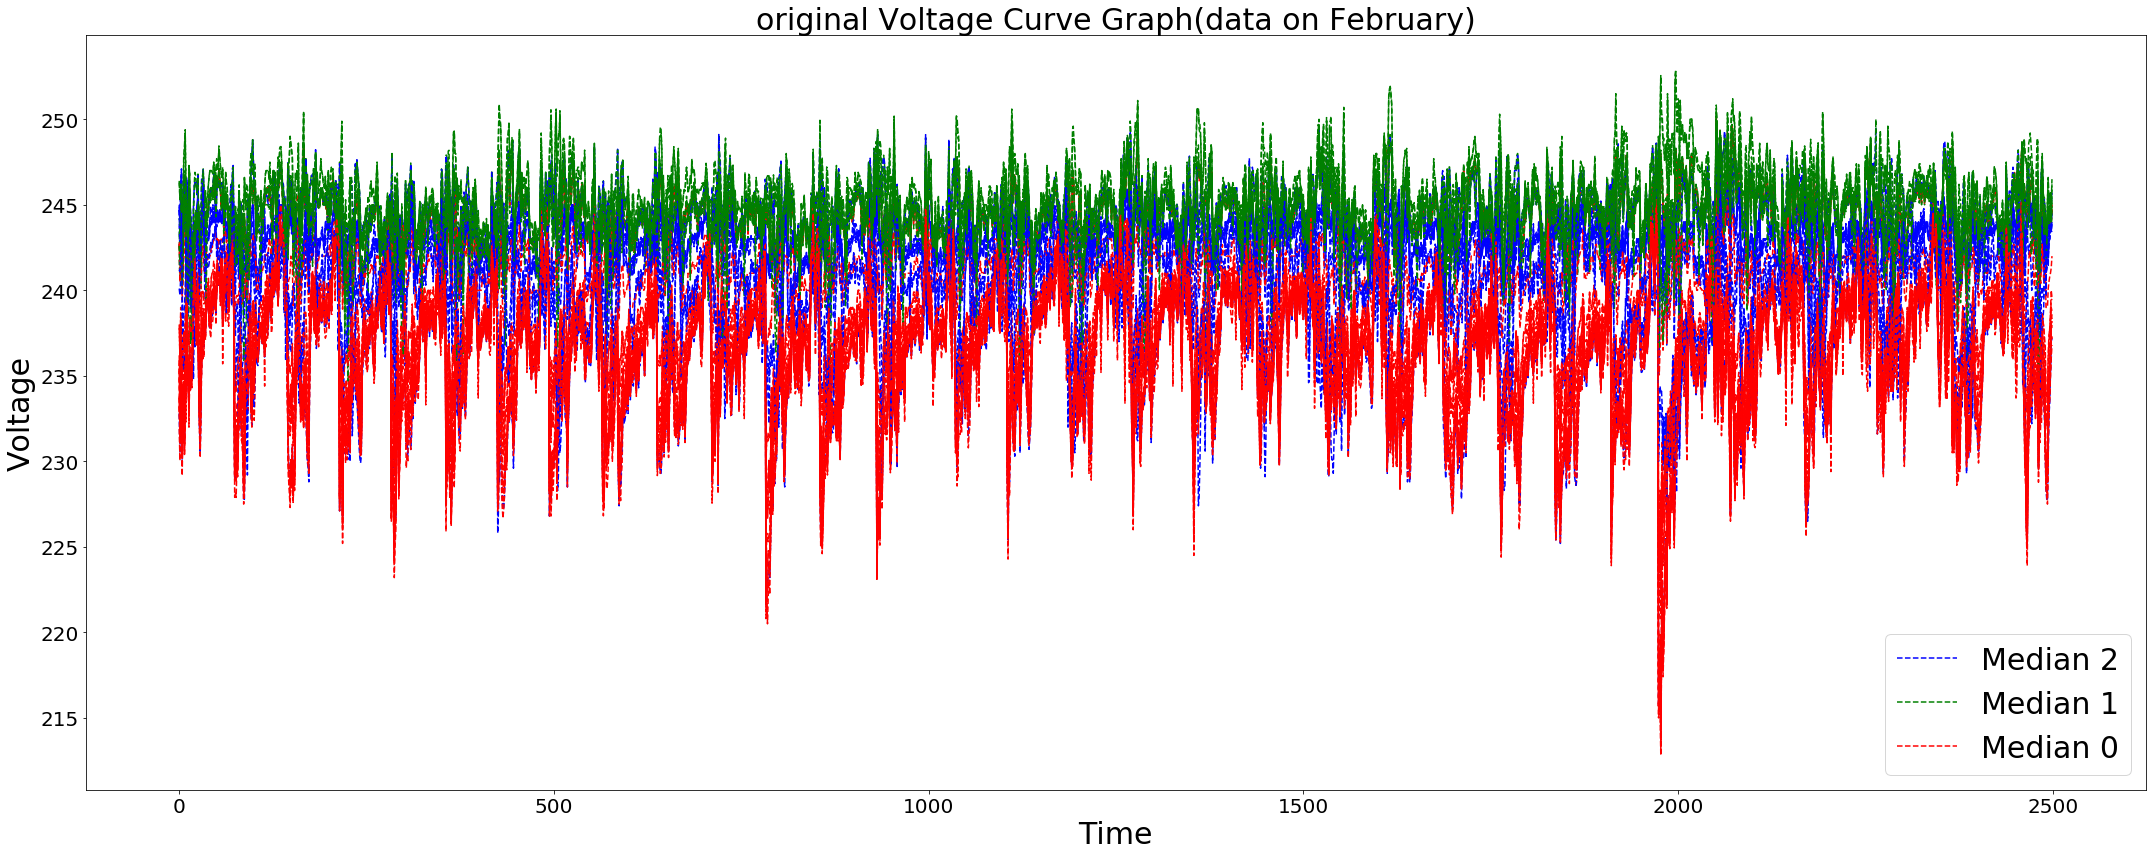

In [54]:
cur_idlist = id_list[:2] + id_list[3:12] + id_list[13:]  # 删除8和34的id list

color_list = ['red','green','blue']
cluster_num = 3
x = range(2500)
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(cur_idlist)):
    row = data_ten_minutes[data_ten_minutes['Id'] == cur_idlist[i]]
    idx = row['labels'].values[0]
    y =[] 
    for j in range(2500):
        tem = row.iat[0,j+1]
        y.append(tem)
#     print(x, y)
    plt.plot(x,y,color = color_list[idx], ls = '--',label = 'cluster '  + str(idx))
    
plt.legend(['Median 2', 'Median 1', 'Median 0'], loc = 'lower right',fontsize = 30)
plt.title('original Voltage Curve Graph(data on February)', fontsize = 30)
plt.xlabel('Time', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)
plt.tick_params(labelsize=20)

plt.tight_layout()
plt.show()

# plot kmeans label

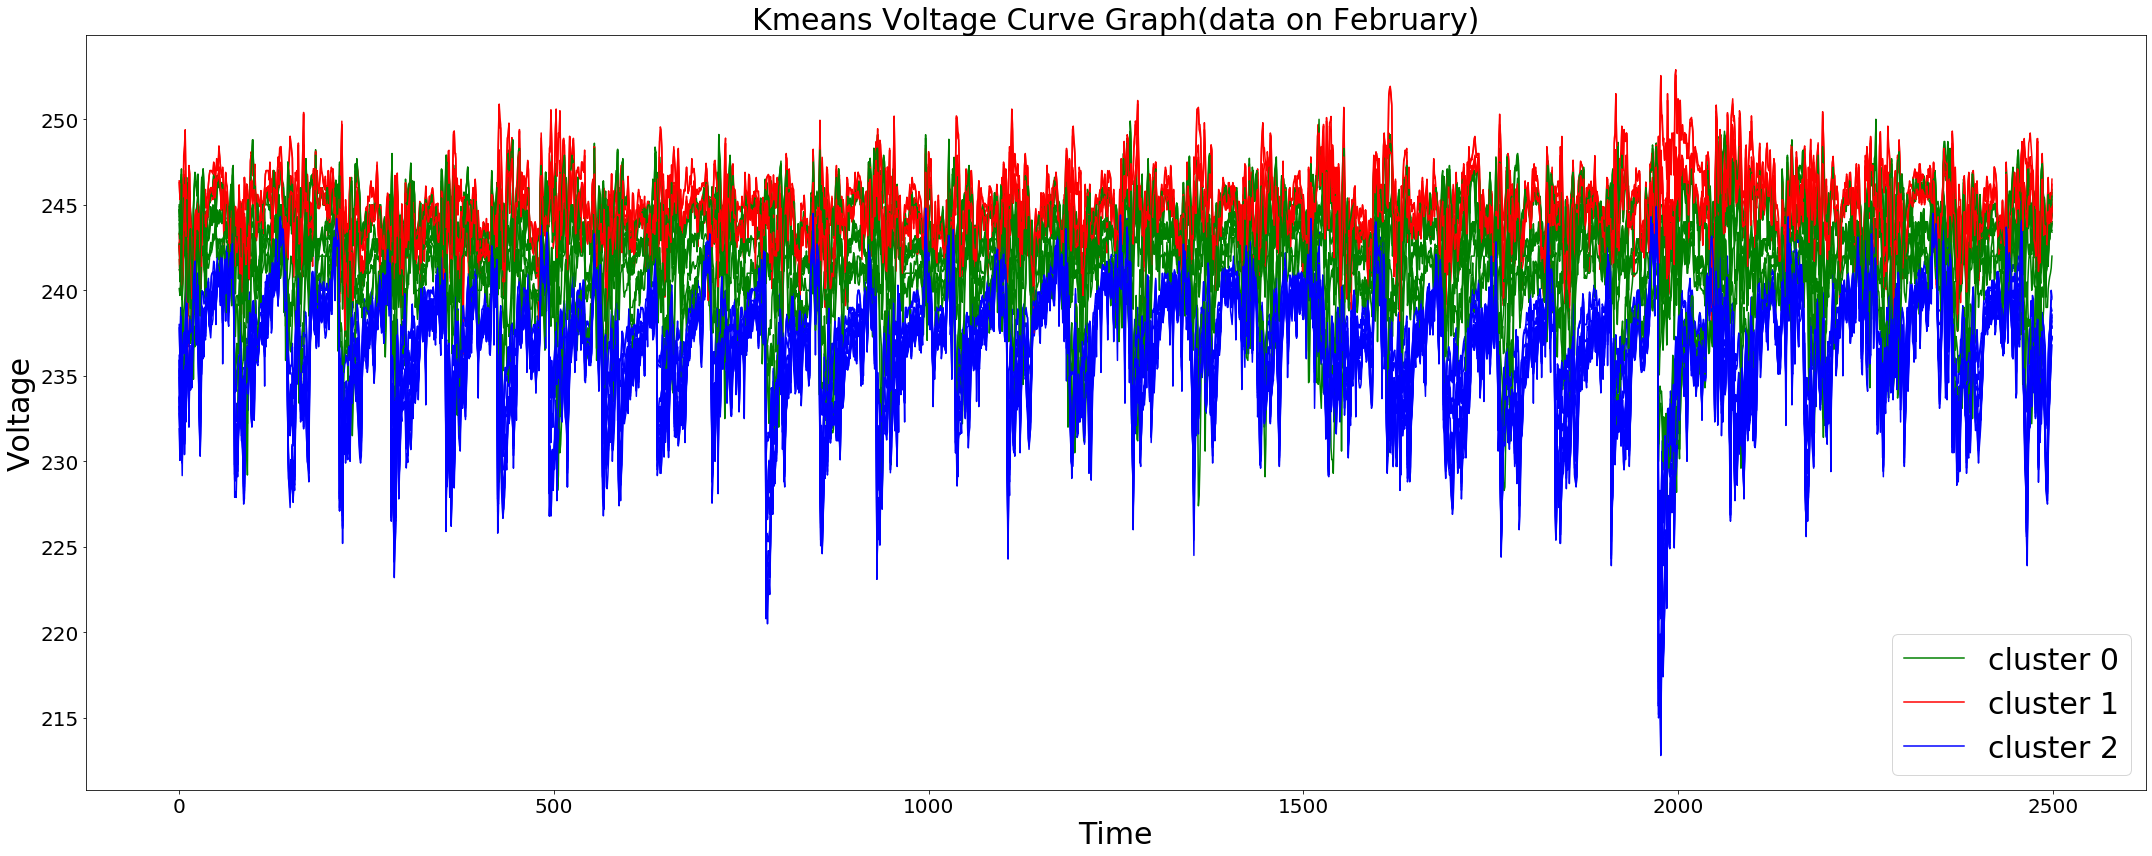

In [55]:
cur_idlist = id_list[:2] + id_list[3:12] + id_list[13:]  # 删除8和34的id list

color_list = ['blue','red','green']
cluster_num = 3
x = range(2500)
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(cur_idlist)):
    row = data_ten_minutes[data_ten_minutes['Id'] == cur_idlist[i]]
    idx = row['labels_kmeans'].values[0]
    y =[] 
    for j in range(2500):
        tem = row.iat[0,j+1]
        y.append(tem)
#     print(x, y)
    plt.plot(x,y,color = color_list[idx], label = 'cluster '  + str(idx))
    
plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc = 'lower right',fontsize = 30)
plt.title('Kmeans Voltage Curve Graph(data on February)', fontsize = 30)
plt.xlabel('Time', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)
plt.tick_params(labelsize=20)

plt.tight_layout()
plt.show()

# plot meanshift

IndexError: list index out of range

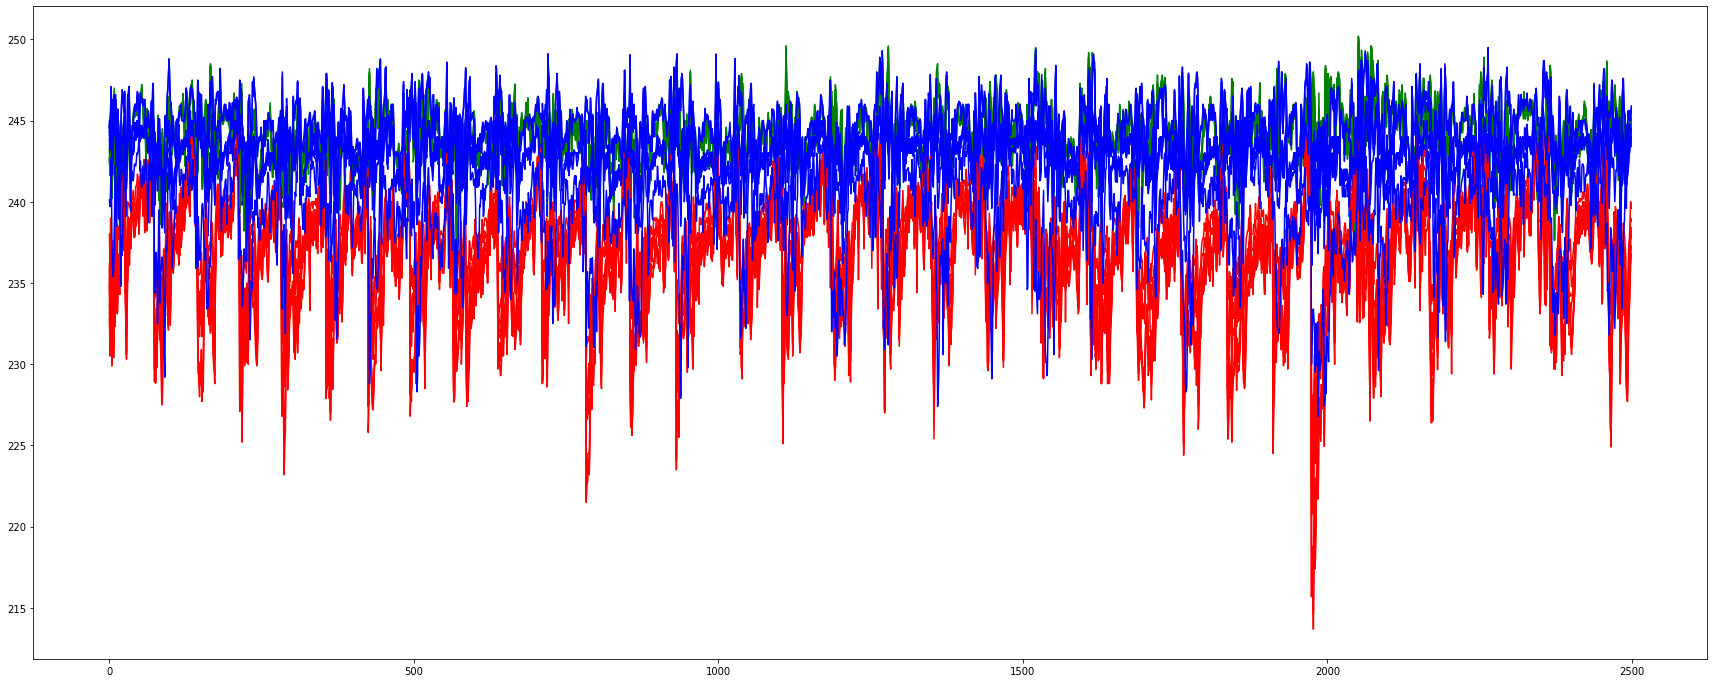

In [56]:
color_list = ['red','blue','green']
cluster_num = 3
x = range(2500)
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(cur_idlist)):
    row = data_ten_minutes[data_ten_minutes['Id'] == cur_idlist[i]]
    idx = row['labels_meanshift'].values[0]
    y =[] 
    for j in range(2500):
        tem = row.iat[0,j+1]
        y.append(tem)
#     print(x, y)
    plt.plot(x,y,color = color_list[idx], label = 'cluster '  + str(idx))
    
plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc = 'lower right',fontsize = 30)
plt.title('Mean shift Voltage Curve Graph(data on February)', fontsize = 30)
plt.xlabel('Time', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)
plt.tick_params(labelsize=20)

plt.tight_layout()
plt.show()

# plot DBSCAN

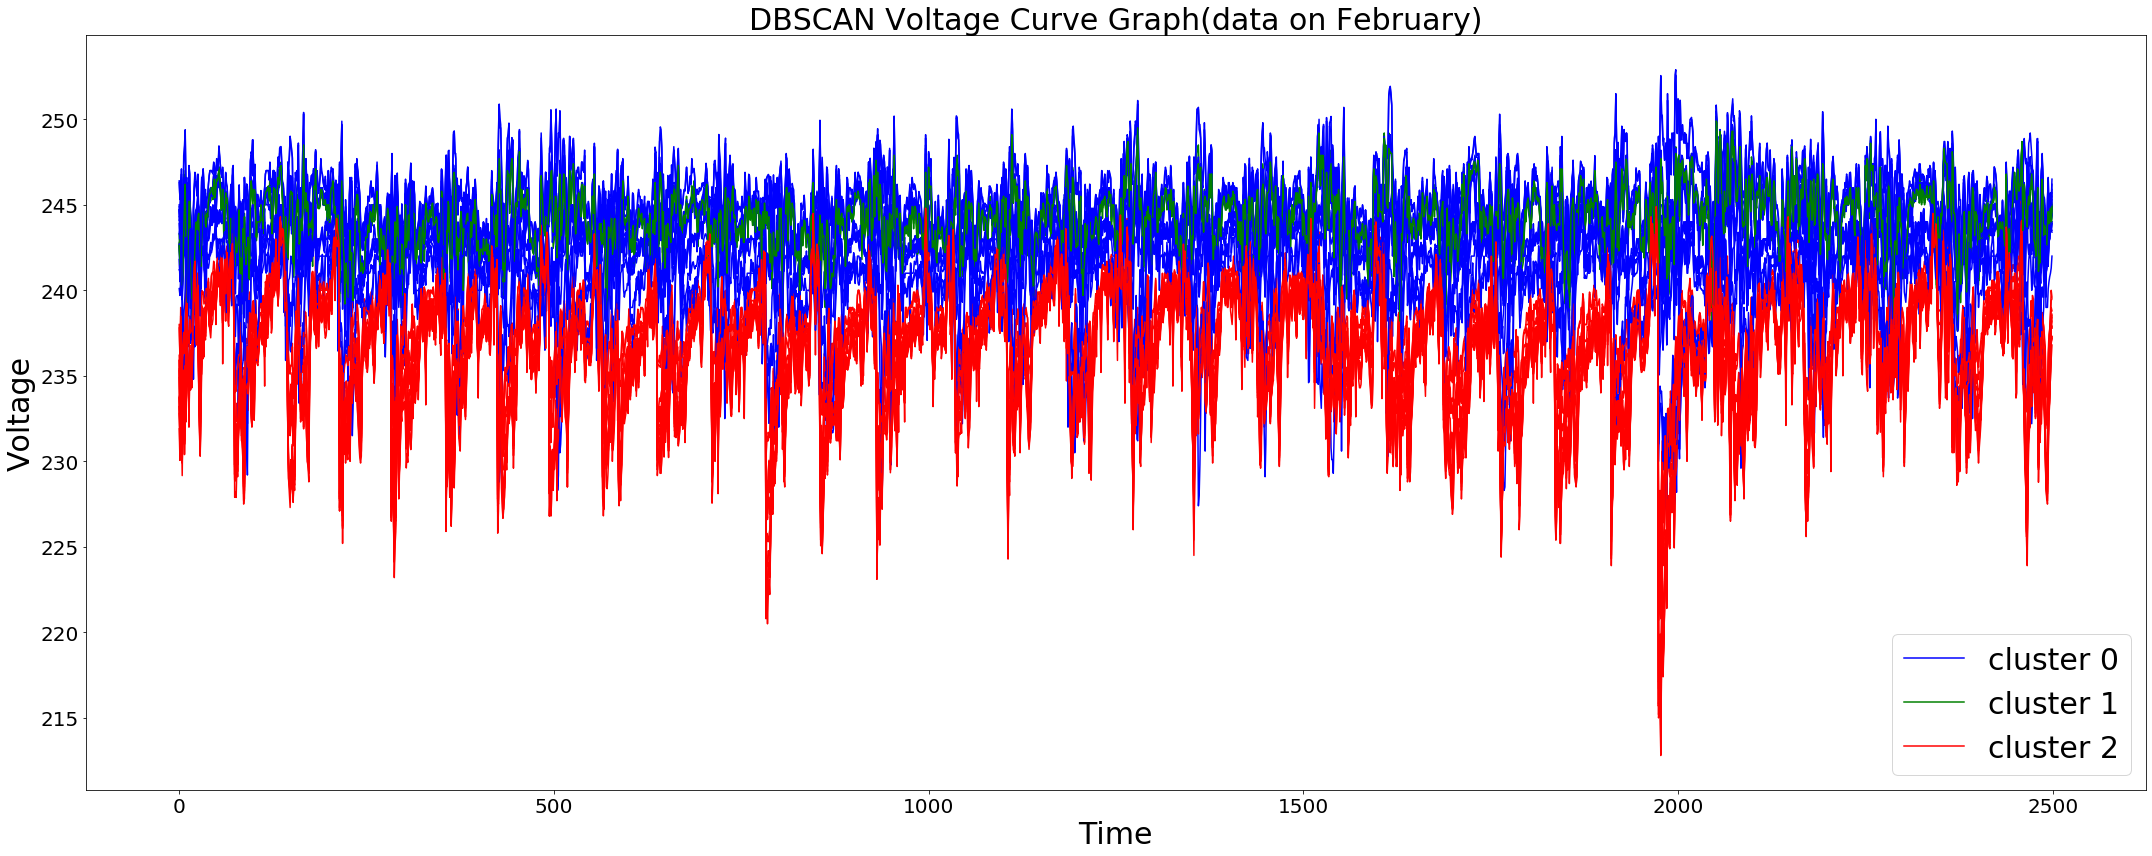

In [62]:
color_list = ['blue','green','red']
cluster_num = 3
x = range(2500)
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(cur_idlist)):
    row = data_ten_minutes[data_ten_minutes['Id'] == cur_idlist[i]]
    idx = row['labels_dbscan'].values[0]
    y =[] 
    for j in range(2500):
        tem = row.iat[0,j+1]
        y.append(tem)
#     print(x, y)
    plt.plot(x,y,color = color_list[idx], label = 'cluster '  + str(idx))

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc = 'lower right',fontsize = 30)

plt.title('DBSCAN Voltage Curve Graph(data on February)', fontsize = 30)
plt.xlabel('Time', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)
plt.tick_params(labelsize=20)

plt.tight_layout()
plt.show()



# plot Guassian

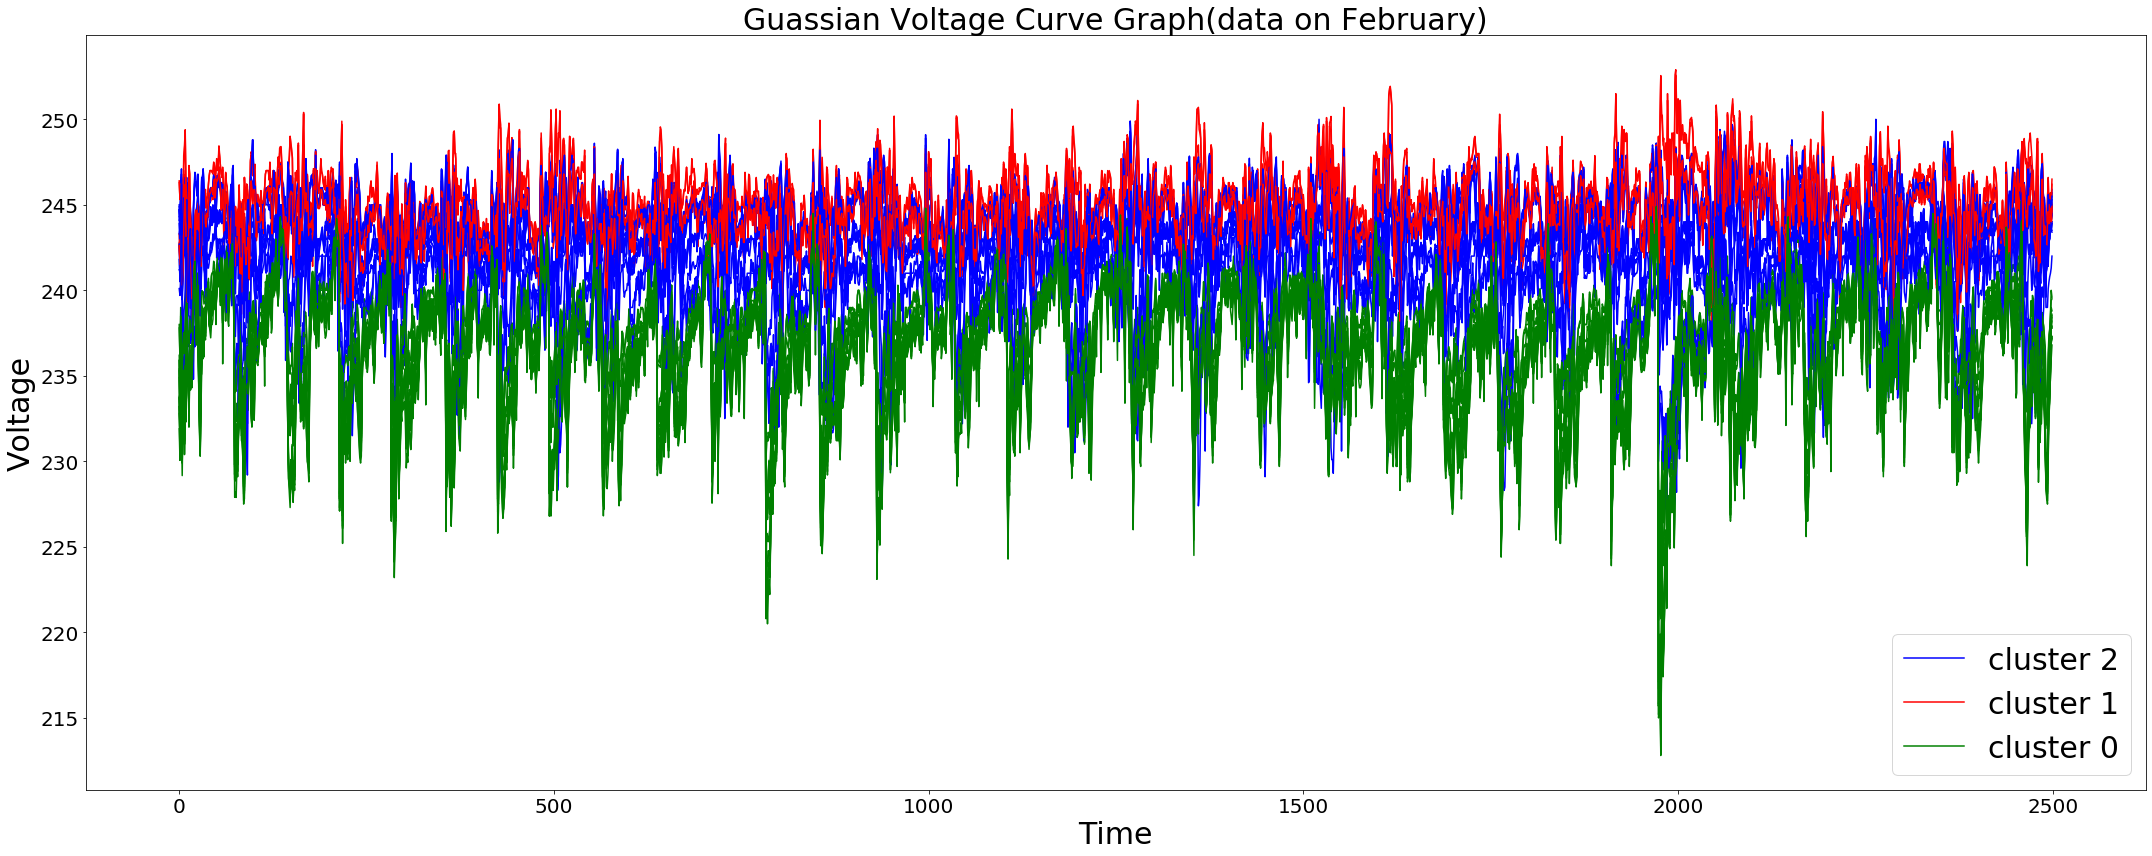

In [63]:
color_list = ['green','red','blue']
cluster_num = 3
x = range(2500)
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(cur_idlist)):
    row = data_ten_minutes[data_ten_minutes['Id'] == cur_idlist[i]]
    idx = row['labels_gaussian'].values[0]
    y =[] 
    for j in range(2500):
        tem = row.iat[0,j+1]
        y.append(tem)
#     print(x, y)
    plt.plot(x,y,color = color_list[idx], label = 'cluster '  + str(idx))

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc = 'lower right',fontsize = 30)

plt.title('Guassian Voltage Curve Graph(data on February)', fontsize = 30)
plt.xlabel('Time', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)
plt.tick_params(labelsize=20)

plt.tight_layout()
plt.show()


# Confusion Matrix Kmeans

In [64]:
from sklearn.metrics import confusion_matrix
y_actu = data_ten_minutes['labels']
y_pred = data_ten_minutes['labels_kmeans']
confusion_matrix(y_actu, y_pred)

array([[14,  1,  1],
       [ 0,  7,  2],
       [ 1,  0,  9]], dtype=int64)

In [65]:
y_actu = pd.Series(data_ten_minutes['labels'], name='Actual')
y_pred = pd.Series(data_ten_minutes['labels_kmeans'], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted,0,1,2
Actual,,,
0,14,1,1
1,0,7,2
2,1,0,9


# Confusion Matrix Mean Shift

In [66]:
y_actu = pd.Series(data_ten_minutes['labels'], name='Actual')
y_pred = pd.Series(data_ten_minutes['labels_meanshift'], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted,0,1,2,3,4
Actual,,,,,
0,14,0,1,1,0
1,0,2,6,0,1
2,1,9,0,0,0


# Confusion Matrix DBSCAN

In [67]:
y_actu = pd.Series(data_ten_minutes['labels'], name='Actual')
y_pred = pd.Series(data_ten_minutes['labels_dbscan'], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted,0,1,2
Actual,,,
0,1,1,14
1,5,4,0
2,9,0,1


# Confusion Matrix Gaussian

In [68]:
y_actu = pd.Series(data_ten_minutes['labels'], name='Actual')
y_pred = pd.Series(data_ten_minutes['labels_gaussian'], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted,0,1,2
Actual,,,
0,14,1,1
1,0,6,3
2,1,0,9


# Gaussian Heatmap

In [ ]:
heatmap_kmeans = list(labels_gaussian) 
heatmap_kmeans = heatmap_kmeans[:2] + heatmap_kmeans[3:12] + heatmap_kmeans[13:]
# print(heatmap_kmeans)

# 将每个id 与label 对应
dic = {}
for i in range(len(cur_idlist)):
    dic[cur_idlist[i]] = heatmap_kmeans[i]

# print(dic)

orders = []
for i in range(3):
    for j in range(len(dic)):
        if dic[cur_idlist[j]] == i:
            orders.append(cur_idlist[j])
# orders

heatmap_ten = tranpose_ten
heatmap_ten =  heatmap_ten.drop([8], axis=1)
heatmap_ten = heatmap_ten.drop([34], axis=1)

heatmap_ten = heatmap_ten[orders]
heatmap_corr = heatmap_ten.corr()

heat_dissimilarity = 1 - np.abs(heatmap_corr)
ax = sns.heatmap(heat_dissimilarity.T)

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(0)
    
ax.xaxis.set_ticks_position('top')
    

# save figure
plt.savefig('heatmap_guassian.png', dpi=1000)
plt.show()

# Kmeans Heatmap

In [ ]:
heatmap_kmeans = list(labels_kmeans) 
heatmap_kmeans = heatmap_kmeans[:2] + heatmap_kmeans[3:12] + heatmap_kmeans[13:]
# print(heatmap_kmeans)

# 将每个id 与label 对应
dic = {}
for i in range(len(cur_idlist)):
    dic[cur_idlist[i]] = heatmap_kmeans[i]

print(dic)

orders = []
for i in range(3):
    for j in range(len(dic)):
        if dic[cur_idlist[j]] == i:
            orders.append(cur_idlist[j])
# orders

In [ ]:
heatmap_ten = tranpose_ten
heatmap_ten =  heatmap_ten.drop([8], axis=1)
heatmap_ten = heatmap_ten.drop([34], axis=1)

heatmap_ten = heatmap_ten[orders]

In [ ]:
heatmap_corr = heatmap_ten.corr()

In [ ]:
heat_dissimilarity = 1 - np.abs(heatmap_corr)
ax = sns.heatmap(heat_dissimilarity.T)

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(90)

# save figure
plt.savefig('heatmap_kmeans.png', dpi=100)
plt.show()

# Mean Shift

In [ ]:
heatmap_kmeans = list(labels_mean) 
heatmap_kmeans = heatmap_kmeans[:2] + heatmap_kmeans[3:12] + heatmap_kmeans[13:]
# print(heatmap_kmeans)

# 将每个id 与label 对应
dic = {}
for i in range(len(cur_idlist)):
    dic[cur_idlist[i]] = heatmap_kmeans[i]

# print(dic)

orders = []
for i in range(3):
    for j in range(len(dic)):
        if dic[cur_idlist[j]] == i:
            orders.append(cur_idlist[j])
# orders

heatmap_ten = tranpose_ten
heatmap_ten =  heatmap_ten.drop([8], axis=1)
heatmap_ten = heatmap_ten.drop([34], axis=1)

heatmap_ten = heatmap_ten[orders]
heatmap_corr = heatmap_ten.corr()

heat_dissimilarity = 1 - np.abs(heatmap_corr)
ax = sns.heatmap(heat_dissimilarity.T)

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(90)

# save figure
plt.savefig('heatmap_meanshift.png', dpi=100)
plt.show()